| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

## Nama : Aisah
## NIM : A12.2020.06389

# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    
    # Autentikasi dan akses menggunakan keys
    auth = tweepy.OAuthHandler("AdnfxhUYr4N8SwdDd6WcfB0NM", 
    "MaOpj24BwdjatRqwD58HjICI1QDQYxClhztWoiA4b2qIP78eZN")
    auth.set_access_token("1574670640560238592-ra749kRZ6w0lbFYwEjJksECLqgR03f", 
    "q6ECtnOlWhCwOOUCHl7vAIOgYOyV5CdFhdeNz4TOOJIJf")
    
    # Kembalikan akses ke API
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username
username yang saya gunakan yaitu @isyanasarasvati

In [4]:
tweets = extractor.user_timeline(screen_name="isyanasarasvati", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 96.

5 tweet teratas:

Yukk ngobrol lagi! Hari ini aku akan live dengan PINTU di Youtube jam 17:00, seee you guys 🥰… https://t.co/pHUjqtKlTg

🔥🔥🔥 https://t.co/nRLud5qHiZ

RT @SuperlativeSS: 🎁 My Mystery NFT WL Giveaways By @isyanasarasvati 🎁

To join, visit the link below:
https://t.co/REde2sNiW2

Winners are…

Wow pertama kali live di twitter space dan langsung back-to-back 😂 

Join us yaa jam 19:00 dengan @IDNFT_ daaan jam… https://t.co/mHWUvHs5Dp

RT @okxweb3: 💫OKX Web3 Special Event with @isyanasarasvati | @hmxnft | @redrose_records 

🔥Isyana Sarasvati my Mystery NFT
✨50 Whitelists #…



## Memasukkan ke dataframe pandas

In [5]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(10))

,Tweets
0,Yukk ngobrol lagi! Hari ini aku akan live deng...
1,🔥🔥🔥 https://t.co/nRLud5qHiZ
2,RT @SuperlativeSS: 🎁 My Mystery NFT WL Giveawa...
3,Wow pertama kali live di twitter space dan lan...
4,RT @okxweb3: 💫OKX Web3 Special Event with @isy...
5,Congratulations on the new website @Mindblowon...
6,RT @redrose_records: Selamat @isyanasarasvati ...
7,"Hasil digging, duhh lucu piu SSS 🥺🌈🤍 https://t..."
8,Happy anniversary IDNFT!! Sampai jumpa sebenta...
9,Besok bakal ikut memeriahkan panggung DeadSqua...


In [6]:
dataset.to_csv('dataset_isyanasarasvati.csv')

## Menetukan sentimen pada tweet

In [7]:
! pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [9]:
 # Autentikasi dan akses menggunakan keys
auth = tweepy.OAuthHandler("AdnfxhUYr4N8SwdDd6WcfB0NM","MaOpj24BwdjatRqwD58HjICI1QDQYxClhztWoiA4b2qIP78eZN")
auth.set_access_token("1574670640560238592-ra749kRZ6w0lbFYwEjJksECLqgR03f","q6ECtnOlWhCwOOUCHl7vAIOgYOyV5CdFhdeNz4TOOJIJf")
    
api = tw.API(auth)
    
hasilsearch = api.search_tweets(q="isyanasarasvati",lang="id",count=100) 

In [10]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet.created_at
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["Tweet"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)
        

NowPlaying Sekali Lagi Indonesiaku ambon
'list' object has no attribute 'strip'
woowww selalu takjublaah
'list' object has no attribute 'strip'
keren bgt sih ah blm bisa move on
'list' object has no attribute 'strip'
RT Hallo Ncik dan Puan Pekanbaru semuanya Udah siap seru seruan bareng di Konser CollabonationTour Pekanbaru bareng
'list' object has no attribute 'strip'
Hallo Ncik dan Puan Pekanbaru semuanya Udah siap seru seruan bareng di Konser CollabonationTour Pekanbaru bareng
'list' object has no attribute 'strip'
mba sampean keren bgt
'list' object has no attribute 'strip'
Sama sama Mba
'list' object has no attribute 'strip'
RT CollabonationTour akan tiba di Pekanbaru untuk rayakan Era Baru Jaringan Baru IM3 Kali ini kami akan datang bersama
'list' object has no attribute 'strip'
Wendywalters Sekilas kek
'list' object has no attribute 'strip'
RT Terima kasih untuk para narasumber yang sudah berbagi sudut pandang tentang NFT jurnali
'list' object has no attribute 'strip'
Terima kas

In [11]:
df = pd.DataFrame(hasilanalisis) #convert ke data pandas dataframe
df

,tanggal_tweet,pengguna,Tweet,sentimen
0,2022-10-31 03:37:39+00:00,dms_ambon,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0
1,2022-10-30 22:17:51+00:00,cindy_kuncoro,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0
2,2022-10-30 16:20:35+00:00,avandabc,keren bgt sih ah blm bisa move on @isyanasaras...,0
3,2022-10-30 13:01:42+00:00,saidmzaki,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0
4,2022-10-30 12:20:09+00:00,infoPKU,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0
...,...,...,...,...
95,2022-10-25 04:44:12+00:00,priyombodo,@srikumoro @nftkompas @isyanasarasvati @Superl...,0
96,2022-10-25 04:42:07+00:00,zzenbe02,@isyanasarasvati Wow keren kak . Semangat teru...,1
97,2022-10-25 03:53:18+00:00,srikumoro,Monggo dipun waos. \nCc: @nftkompas @isyanasar...,0
98,2022-10-25 03:36:44+00:00,HeliosCaerus,@isyanasarasvati Pasti keren &amp; laris nih,0


In [12]:
df.to_csv('Dataset_Sentimen.csv') #simpan pandas dataframe ke csv file

# Load dataset mentah - lihat skema klasifikasi

In [13]:
df = pd.read_csv('Dataset_Sentimen.csv')

# Preprocessing Tahap 00

In [14]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['tanggal_tweet'], axis=1)
df = df.drop(['pengguna'], axis=1)

## cek info

In [15]:
df.head()

,Tweet,sentimen
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0
2,keren bgt sih ah blm bisa move on @isyanasaras...,0
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [17]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\Aisyah\AppData\Roaming\Python\Python39\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\Aisyah\AppData\Roaming\Python\Python39\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan

Deklarasikan sesuai kebutuhan

In [19]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [20]:
final_string = []
for text in df['Tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [21]:
df["step01"] = final_string

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [22]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Tweet,sentimen,step01
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0,hashtag now playing hashtag sekali lagi user u...
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0,woowww selalu takjublaah coo3xv0nddlz
2,keren bgt sih ah blm bisa move on @isyanasaras...,0,keren bgt sih ah blm bisa move on user cogcx02...
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0,rt user hallo ncik dan puan pekanbaru semuanya...
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0,hallo ncik dan puan pekanbaru semuanya udah si...
5,mba @isyanasarasvati sampean keren bgt,0,mba user sampean keren bgt
6,Sama-sama Mba @isyanasarasvati https://t.co/xx...,0,sama sama mba user coxxxdvub3az
7,RT @indosatim3: #CollabonationTour akan tiba d...,0,rt user hashtag collabonation tour hashtag aka...
8,@_Wendywalters Sekilas kek @isyanasarasvati,0,user sekilas kek user
9,RT @nftkompas: Terima kasih untuk para narasum...,0,rt user terima kasih untuk para narasumber use...


## Hapus data kosong

In [23]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [24]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     0 non-null      object
 1   sentimen  0 non-null      int64 
 2   step01    0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


In [25]:
df_hapus.head(10)

,Tweet,sentimen,step01


In [26]:
df_new = df[~df.isin(df_hapus)].dropna()

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
 2   step01    100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [28]:
df_new

,Tweet,sentimen,step01
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0,hashtag now playing hashtag sekali lagi user u...
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0,woowww selalu takjublaah coo3xv0nddlz
2,keren bgt sih ah blm bisa move on @isyanasaras...,0,keren bgt sih ah blm bisa move on user cogcx02...
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0,rt user hallo ncik dan puan pekanbaru semuanya...
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0,hallo ncik dan puan pekanbaru semuanya udah si...
...,...,...,...
95,@srikumoro @nftkompas @isyanasarasvati @Superl...,0,user user user user menarik dibaca
96,@isyanasarasvati Wow keren kak . Semangat teru...,1,user wow keren kak semangat terus berkarya
97,Monggo dipun waos. \nCc: @nftkompas @isyanasar...,0,monggo dipun waos cc user user user nft dunia ...
98,@isyanasarasvati Pasti keren &amp; laris nih,0,user pasti keren laris nih


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [29]:
## Bisa menggunakan nltk 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aisyah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [31]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [32]:
df_new.head(10)

,Tweet,sentimen,step01,tokens
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0,hashtag now playing hashtag sekali lagi user u...,"[hashtag, now, playing, hashtag, sekali, lagi,..."
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0,woowww selalu takjublaah coo3xv0nddlz,"[woowww, selalu, takjublaah, coo3xv0nddlz]"
2,keren bgt sih ah blm bisa move on @isyanasaras...,0,keren bgt sih ah blm bisa move on user cogcx02...,"[keren, bgt, sih, ah, blm, bisa, move, on, use..."
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0,rt user hallo ncik dan puan pekanbaru semuanya...,"[rt, user, hallo, ncik, dan, puan, pekanbaru, ..."
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0,hallo ncik dan puan pekanbaru semuanya udah si...,"[hallo, ncik, dan, puan, pekanbaru, semuanya, ..."
5,mba @isyanasarasvati sampean keren bgt,0,mba user sampean keren bgt,"[mba, user, sampean, keren, bgt]"
6,Sama-sama Mba @isyanasarasvati https://t.co/xx...,0,sama sama mba user coxxxdvub3az,"[sama, sama, mba, user, coxxxdvub3az]"
7,RT @indosatim3: #CollabonationTour akan tiba d...,0,rt user hashtag collabonation tour hashtag aka...,"[rt, user, hashtag, collabonation, tour, hasht..."
8,@_Wendywalters Sekilas kek @isyanasarasvati,0,user sekilas kek user,"[user, sekilas, kek, user]"
9,RT @nftkompas: Terima kasih untuk para narasum...,0,rt user terima kasih untuk para narasumber use...,"[rt, user, terima, kasih, untuk, para, narasum..."


In [33]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [34]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [35]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [36]:
df_new["step02"] = final_string_tokens

Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [37]:
df_new.head(10)

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0,hashtag now playing hashtag sekali lagi user u...,"[hashtag, now, playing, hashtag, sekali, lagi,...","[hashtag, now, playing, hashtag, sekali, lagi,...",hashtag now playing hashtag sekali lagi user u...
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0,woowww selalu takjublaah coo3xv0nddlz,"[woowww, selalu, takjublaah, coo3xv0nddlz]","[woowww, selalu, takjublaah, coo3xv0nddlz]",woowww selalu takjublaah coo3xv0nddlz
2,keren bgt sih ah blm bisa move on @isyanasaras...,0,keren bgt sih ah blm bisa move on user cogcx02...,"[keren, bgt, sih, ah, blm, bisa, move, on, use...","[keren, banget, sih, ah, belum, bisa, move, on...",keren banget sih ah belum bisa move on user co...
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0,rt user hallo ncik dan puan pekanbaru semuanya...,"[rt, user, hallo, ncik, dan, puan, pekanbaru, ...","[rt, user, hallo, ncik, dan, puan, pekanbaru, ...",rt user hallo ncik dan puan pekanbaru semuanya...
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0,hallo ncik dan puan pekanbaru semuanya udah si...,"[hallo, ncik, dan, puan, pekanbaru, semuanya, ...","[hallo, ncik, dan, puan, pekanbaru, semuanya, ...",hallo ncik dan puan pekanbaru semuanya sudah s...
5,mba @isyanasarasvati sampean keren bgt,0,mba user sampean keren bgt,"[mba, user, sampean, keren, bgt]","[mbak, user, sampean, keren, banget]",mbak user sampean keren banget
6,Sama-sama Mba @isyanasarasvati https://t.co/xx...,0,sama sama mba user coxxxdvub3az,"[sama, sama, mba, user, coxxxdvub3az]","[sama, sama, mbak, user, coxxxdvub3az]",sama sama mbak user coxxxdvub3az
7,RT @indosatim3: #CollabonationTour akan tiba d...,0,rt user hashtag collabonation tour hashtag aka...,"[rt, user, hashtag, collabonation, tour, hasht...","[rt, user, hashtag, collabonation, tour, hasht...",rt user hashtag collabonation tour hashtag aka...
8,@_Wendywalters Sekilas kek @isyanasarasvati,0,user sekilas kek user,"[user, sekilas, kek, user]","[user, sekilas, kayak, user]",user sekilas kayak user
9,RT @nftkompas: Terima kasih untuk para narasum...,0,rt user terima kasih untuk para narasumber use...,"[rt, user, terima, kasih, untuk, para, narasum...","[rt, user, terima, kasih, untuk, para, narasum...",rt user terima kasih untuk para narasumber use...


## simpan file terlebih dahulu

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [38]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load sastrawi

In [39]:
! pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [40]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## stopwords

In [41]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [42]:
df_new['step02'] = df_new['step02'].apply(str)

In [43]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0,hashtag now playing hashtag sekali lagi user u...,"[hashtag, now, playing, hashtag, sekali, lagi,...","[hashtag, now, playing, hashtag, sekali, lagi,...",hashtag now playing hashtag sekali lagi user u...
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0,woowww selalu takjublaah coo3xv0nddlz,"[woowww, selalu, takjublaah, coo3xv0nddlz]","[woowww, selalu, takjublaah, coo3xv0nddlz]",woowww selalu takjublaah coo3xv0nddlz
2,keren bgt sih ah blm bisa move on @isyanasaras...,0,keren bgt sih ah blm bisa move on user cogcx02...,"[keren, bgt, sih, ah, blm, bisa, move, on, use...","[keren, banget, sih, ah, belum, bisa, move, on...",keren banget sih ah belum bisa move on user co...
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0,rt user hallo ncik dan puan pekanbaru semuanya...,"[rt, user, hallo, ncik, dan, puan, pekanbaru, ...","[rt, user, hallo, ncik, dan, puan, pekanbaru, ...",rt user hallo ncik dan puan pekanbaru semuanya...
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0,hallo ncik dan puan pekanbaru semuanya udah si...,"[hallo, ncik, dan, puan, pekanbaru, semuanya, ...","[hallo, ncik, dan, puan, pekanbaru, semuanya, ...",hallo ncik dan puan pekanbaru semuanya sudah s...


In [44]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [45]:
df_new.loc[:, ('ProcessedText')] = final_string

In [46]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,#NowPlaying Sekali Lagi - @isyanasarasvati @So...,0,hashtag now playing hashtag sekali lagi user u...,"[hashtag, now, playing, hashtag, sekali, lagi,...","[hashtag, now, playing, hashtag, sekali, lagi,...",hashtag now playing hashtag sekali lagi user u...,hashtag now playing hashtag sekali user user h...
1,woowww selalu takjublaah https://t.co/O3xV0NDdLZ,0,woowww selalu takjublaah coo3xv0nddlz,"[woowww, selalu, takjublaah, coo3xv0nddlz]","[woowww, selalu, takjublaah, coo3xv0nddlz]",woowww selalu takjublaah coo3xv0nddlz,woowww selalu takjublaah coo3xv0nddlz
2,keren bgt sih ah blm bisa move on @isyanasaras...,0,keren bgt sih ah blm bisa move on user cogcx02...,"[keren, bgt, sih, ah, blm, bisa, move, on, use...","[keren, banget, sih, ah, belum, bisa, move, on...",keren banget sih ah belum bisa move on user co...,keren banget sih ah bisa move on user cogcx02p...
3,RT @infoPKU: Hallo Ncik dan Puan Pekanbaru sem...,0,rt user hallo ncik dan puan pekanbaru semuanya...,"[rt, user, hallo, ncik, dan, puan, pekanbaru, ...","[rt, user, hallo, ncik, dan, puan, pekanbaru, ...",rt user hallo ncik dan puan pekanbaru semuanya...,rt user hallo ncik puan pekanbaru semua siap s...
4,Hallo Ncik dan Puan Pekanbaru semuanya. Udah s...,0,hallo ncik dan puan pekanbaru semuanya udah si...,"[hallo, ncik, dan, puan, pekanbaru, semuanya, ...","[hallo, ncik, dan, puan, pekanbaru, semuanya, ...",hallo ncik dan puan pekanbaru semuanya sudah s...,hallo ncik puan pekanbaru semua siap seru seru...


## simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [47]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

In [48]:
dataset_feature = df_new['ProcessedText']

In [49]:
dataset_label = df_new['sentimen']

## Cek Distribusi Data

In [50]:
dataset_label.value_counts()

 0    79
 1    19
-1     2
Name: sentimen, dtype: int64

In [51]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 0    79.0%
 1    19.0%
-1     2.0%
Name: sentimen, dtype: object

<Figure size 864x576 with 0 Axes>

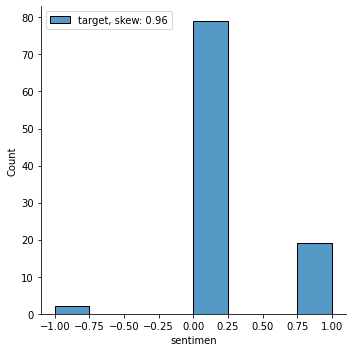

In [52]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

**Kesimpulan dataset: ??? **

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Emosi 

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
vectorizer = TfidfVectorizer()

In [55]:
positive_low_reviews = df_new[(df_new["sentimen"] == 1)]
negative_low_reviews = df_new[(df_new["sentimen"] == -1)]
positive_high_reviews = df_new[(df_new["sentimen"] == 2)]
negative_high_reviews = df_new[(df_new["sentimen"] == -2)]

### cek emosi positive low

In [56]:
positive_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
21,2015-2016 nyanyiin ini sampai diomelin tapi ga...,1,number number nyanyiin ini sampai diomelin tap...,"[number, number, nyanyiin, ini, sampai, diomel...","[number, number, nyanyiin, ini, sampai, diomel...",number number nyanyiin ini sampai diomelin tap...,number number nyanyiin sampai diomelin baik st...
27,@TonightShow_NET @joylandfest Pengen banget no...,1,user user pengen banget nonton live perform ny...,"[user, user, pengen, banget, nonton, live, per...","[user, user, ingin, banget, nonton, live, perf...",user user ingin banget nonton live perform nya...,user user banget nonton live perform nya the a...
29,RT @isyanasarasvati: Yukk ngobrol lagi! Hari i...,1,rt user yukk ngobrol lagi hari ini aku akan li...,"[rt, user, yukk, ngobrol, lagi, hari, ini, aku...","[rt, user, yukk, ngobrol, lagi, hari, ini, aku...",rt user yukk ngobrol lagi hari ini aku akan li...,rt user yukk ngobrol hari aku live pintu youtu...
42,RT @isyanasarasvati: Yukk ngobrol lagi! Hari i...,1,rt user yukk ngobrol lagi hari ini aku akan li...,"[rt, user, yukk, ngobrol, lagi, hari, ini, aku...","[rt, user, yukk, ngobrol, lagi, hari, ini, aku...",rt user yukk ngobrol lagi hari ini aku akan li...,rt user yukk ngobrol hari aku live pintu youtu...
43,RT @isyanasarasvati: Yukk ngobrol lagi! Hari i...,1,rt user yukk ngobrol lagi hari ini aku akan li...,"[rt, user, yukk, ngobrol, lagi, hari, ini, aku...","[rt, user, yukk, ngobrol, lagi, hari, ini, aku...",rt user yukk ngobrol lagi hari ini aku akan li...,rt user yukk ngobrol hari aku live pintu youtu...


In [57]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [58]:
Positive_1_tf_idf.shape 

(19, 123)

In [59]:
! pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [61]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


('user', 7.894639484342173)
('live', 7.837481070502225)
('aku', 7.77685644868579)
('aku live', 7.712317927548219)
('guys', 7.712317927548219)
('hari', 7.712317927548219)
('hari aku', 7.712317927548219)
('jam', 7.712317927548219)
('jam time', 7.712317927548219)
('live pintu', 7.712317927548219)
('ngobrol', 7.712317927548219)
('ngobrol hari', 7.712317927548219)
('pintu', 7.712317927548219)
('pintu youtube', 7.712317927548219)
('seee', 7.712317927548219)
('seee you', 7.712317927548219)
('time', 7.712317927548219)
('time seee', 7.712317927548219)
('you', 7.712317927548219)
('you guys', 7.712317927548219)
('youtube', 7.712317927548219)
('youtube jam', 7.712317927548219)
('yukk', 7.712317927548219)
('yukk ngobrol', 7.712317927548219)
('cop1op6ktbe6', 7.6433250560612676)
('guys cop1op6ktbe6', 7.6433250560612676)
('rt', 7.6433250560612676)
('rt user', 7.6433250560612676)
('user yukk', 7.6433250560612676)
('kak', 6.3905620875658995)
('banget', 6.102880015114119)
('keren', 6.102880015114119)
('n

IndexError: list index out of range

In [62]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

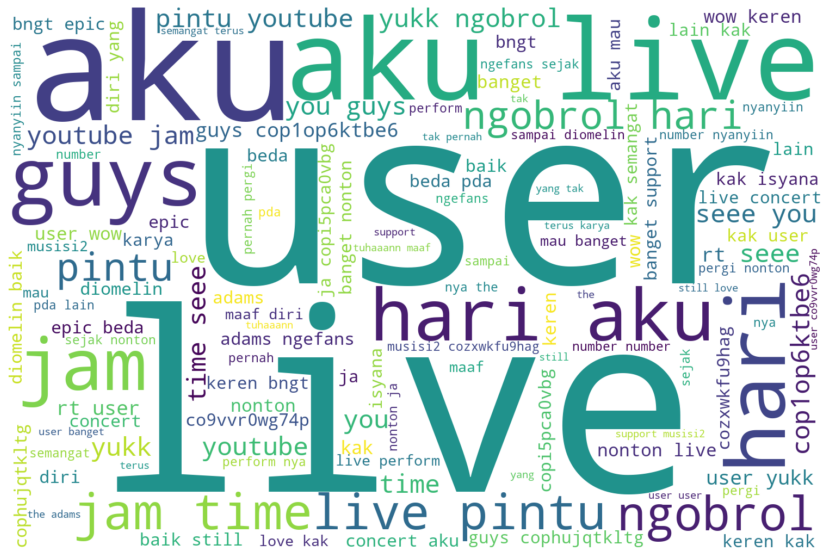

In [63]:
PlotWordCloud(d)

### cek emosi positive high

In [64]:
positive_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


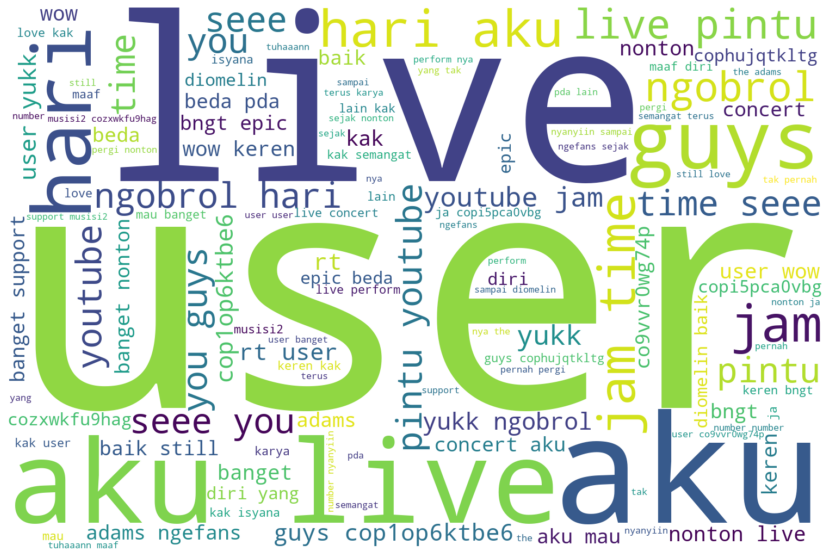

In [65]:
PlotWordCloud(d)

### cek emosi negative low

In [66]:
negative_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
32,@ONEBULLNODE @isyanasarasvati @idnft_ Tunjukka...,-1,user user user tunjukkan talenta om bull di ev...,"[user, user, user, tunjukkan, talenta, om, bul...","[user, user, user, tunjukkan, talenta, om, bul...",user user user tunjukkan talenta om bull di ev...,user user user tunjuk talenta om bull event ka...
64,@omponxxx @Bybit_NFT @isyanasarasvati @sitompu...,-1,user user user user user ke depak berapa um sk...,"[user, user, user, user, user, ke, depak, bera...","[user, user, user, user, user, ke, depak, bera...",user user user user user ke depak berapa um se...,user user user user user depak berapa um sekar...


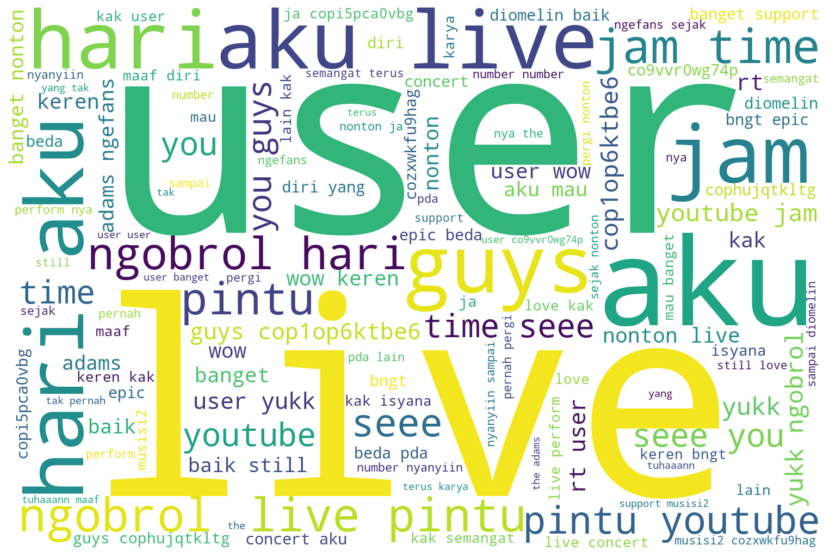

In [67]:
PlotWordCloud(d)

### cek emosi negative high

In [68]:
negative_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


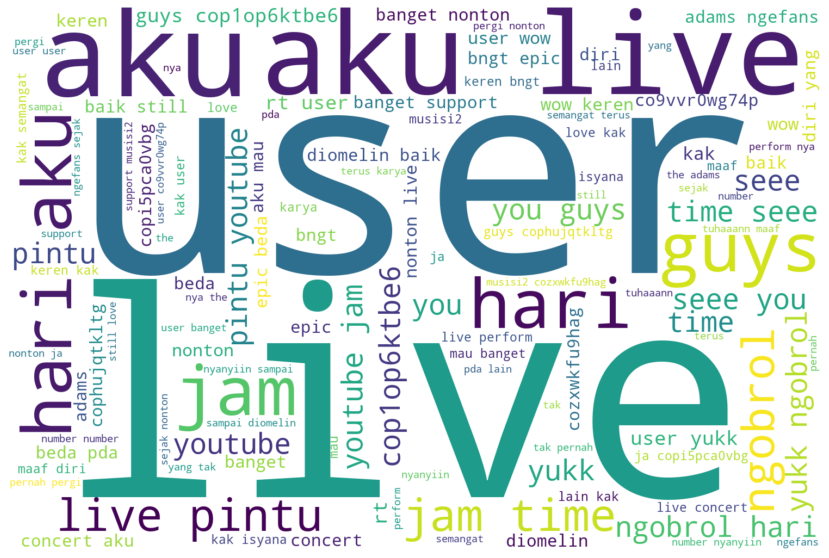

In [69]:
PlotWordCloud(d)

## Cek emosi untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [70]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [71]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [72]:
Data_TFIDF.shape

(100, 945)

## Training dan Testing dibagi menjadi 70 - 30

In [73]:
### Lengkapi kodenya
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [74]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [75]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model - Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [77]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [78]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [79]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [80]:
## Berapa nilai Accuracy Training set dan Test Set
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)


Accuracy Training set:  0.9428571428571428
Accuracy Test set:  0.9333333333333333


In [81]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)


Recall Training set:  0.9428571428571428
Recall Test set:  0.9333333333333333


In [82]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.9182266009852218
Precision Test set:  0.9382716049382717


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


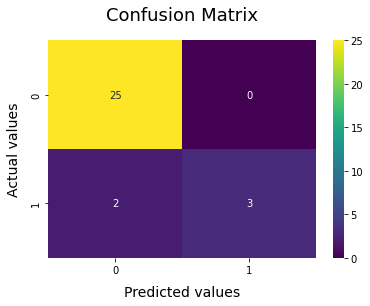

In [83]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [84]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [85]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.942857,0.933333


In [86]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [87]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.933333,0.933333,0.938272


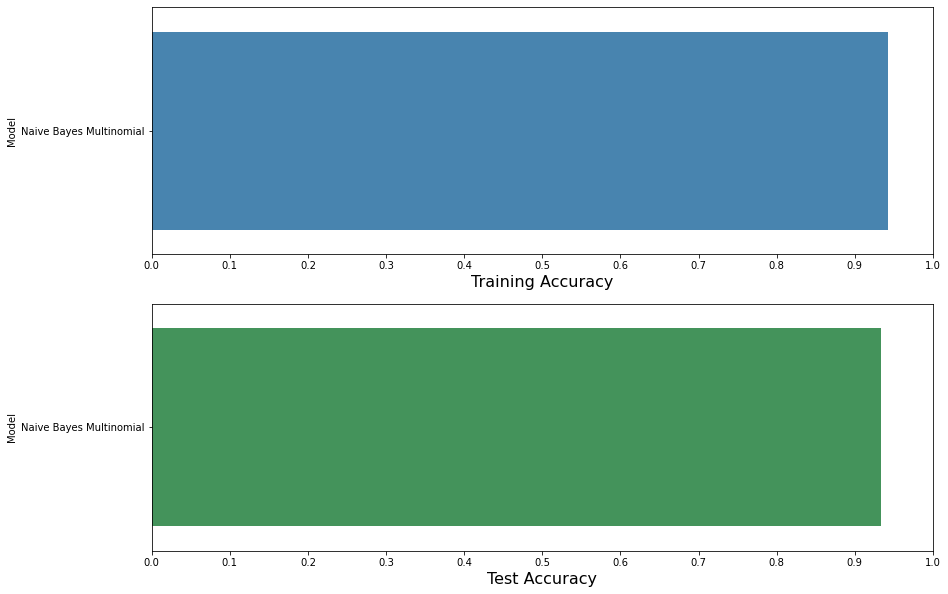

In [88]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan
Dari hasil pengujian setelah melakukan proses steming dan stopworld dapat dilihat bahwa nilai training dan testing memiliki nilai akurasi yang tinggi dimana untung training memiliki nilai akurasi sebanyak 0.94 sedangkan testing memiliki nilai akurasi 0.93